In [20]:
from evspy import decoupled_cs_model
import evspy.loading_empirical_data as loading_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Unloading test

In [21]:
readings,metadata_readings,Cr_current,Cv_current,CalphaCc,testlist = loading_data.import_data('../data/Empirical_data_literature.hdf')

In [22]:
tst = '/TA-1.49_.csv'
Calphahatc = 0.0015
Calphahats = 0.0005
erateci = 1e-8
eratesi = 1e-6
Cr = Cr_current[tst]
Cc = Cr*5
CalphaNC = Cc * 0.04
Cv = Cv_current[tst]
OCR_initial = 1.0
OCR_final = 1.5
model = {}
model[tst] = {}
model[tst][1] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr,CalphaNC, OCR_initial,OCR_final,Cv=Cv,nonlinear_Calphahat=True,hypA=False,beta2=4,beta3=20)
model[tst][2] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr,CalphaNC, OCR_initial,OCR_final,Cv=Cv,nonlinear_Calphahat=False,hypA=False,beta2=4,beta3=20)

/home/thomasvergote/anaconda3/envs/psgis/lib/python3.7/site-packages/evspy/creep_swelling_model.py:60: RuntimeWarning: invalid value encountered in log10
  erates[t-1]=erates[t-1]*10**(5*np.log10((OCR[t]-1)/(OCR[t-1]-1))) # Viscous swelling develops and reduces at the same time while unloading


Text(0, 0.5, 'Void ratio')

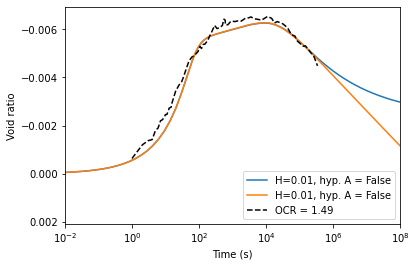

In [24]:
for tst in ['/TA-1.49_.csv']:
    for m in model[tst].values():
        plt.semilogx(m.time,m.e,label="H="+str(m.H)+', hyp. A = '+str(m.hypA))
    plt.plot(readings[tst]['time'],np.interp(readings[tst]['time'].iloc[1],m.time,m.e)+readings[tst]['void ratio change'],'k--',label='OCR = '+str(readings[tst]['OCR'].iloc[0]))

plt.plot()
plt.legend(loc=4)
plt.xlim(1e-2,1e8)
plt.gca().invert_yaxis()
plt.xlabel('Time (s)'); plt.ylabel('Void ratio')

(1.0, 1.6)

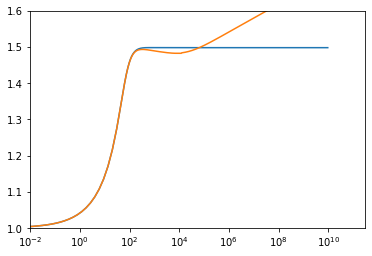

In [25]:
plt.semilogx(m.time,m.OCR)
plt.semilogx(m.time,m.OCR_ref)
plt.xlim(1e-2); plt.ylim(1,1.6)

# Loading test

In [26]:
OCR_initial = 1
OCR_final = 0.5
Cc = 0.3
Cr = Cc/5
Calphahatc = Cc*0.04
erateci = 1e-4
eratesi = 1e-40

In [28]:
model = {}
model[1] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr, CalphaNC, OCR_initial,OCR_final,nonlinear_Calphahat=False,hypA=False,beta2=4,beta3=19)
model[2] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr, CalphaNC, OCR_initial,OCR_final,nonlinear_Calphahat=False,hypA=True,beta2=4,beta3=19)
model[3] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr, CalphaNC, OCR_initial,OCR_final,nonlinear_Calphahat=False,hypA=False,beta2=4,beta3=19, H = 0.5)
model[4] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr, CalphaNC, OCR_initial,OCR_final,nonlinear_Calphahat=False,hypA=True,beta2=4,beta3=19, H = 0.5)

Text(0, 0.5, 'Void ratio')

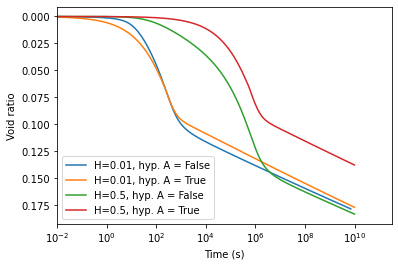

In [29]:
for m in model.values():
    plt.semilogx(m.time,m.e,label="H="+str(m.H)+', hyp. A = '+str(m.hypA))
plt.legend()
plt.xlim(1e-2)
plt.gca().invert_yaxis()
plt.xlabel('Time (s)'); plt.ylabel('Void ratio')

# Relaxation test

In [30]:
readings = {}
metadata_readings = {}
data_store = '../data/Empirical_data_vergote2020.hdf'
with pd.HDFStore(data_store) as hdf:
    test=hdf.keys()
    for tst in test:
        readings[tst], metadata_readings[tst] = loading_data.h5load(hdf,tst)

In [31]:
Calphahatc = 0.004
Calphahats = 0.004
erateci = 1e-7
eratesi = 1e-4
Cr = 0.24
Cc = 1.1
Cv = 1.58e-7
OCR_initial = 1.0
OCR_final = 1.2
sigma0=270
model = {}
model[1] = decoupled_cs_model(Calphahatc, Calphahats,  erateci, eratesi, Cc,Cr, CalphaNC, OCR_initial,OCR_final,sigma0=sigma0,nonlinear_Calphahat=True,hypA=False,beta2=4,beta3=19,model_type = 'relaxation')

Text(0, 0.5, 'Stress (kPa)')

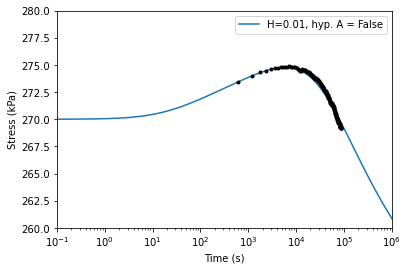

In [32]:
for m in model.values():
    plt.semilogx(m.time,m.sigma,label="H="+str(m.H)+', hyp. A = '+str(m.hypA))
tst = '/relaxation_OCR_1.21'
plt.semilogx(readings[tst]['time'],readings[tst]['load'],'k.')
plt.legend()
plt.xlim(1e-1,1e6)
plt.ylim(260,280)
plt.xlabel('Time (s)'); plt.ylabel('Stress (kPa)')

# CRS test

Text(0, 0.5, 'Void ratio change, $\\Delta e$')

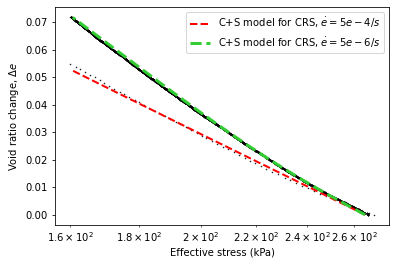

In [33]:
for tst in [ '/CRS_unloading_erate_-5e-6/s', '/CRS_unloading_erate_-5e-4/s']:
    plt.semilogx(readings[tst]['load'],readings[tst]['void_ratio']-readings[tst]['void_ratio'].iloc[0],'k.',ms=1)
m1=0.2
b1=-0.35 
m2=2.13
b2=-5.
sigmap=320
res=evspy.C_S_CRS(Cc,Cr=Cr,sigmap=sigmap,eratec0=1e-20,estart=0,erates0=-1,CalphaNC=0.066,m1=m1,b1=b1,erate=5e-4,m2=m2,b2=b2)
plt.plot(res['sigma'],res['e'],'r--',lw=2,label='C+S model for CRS, $\dot{e}=5e-4/s$')
res=evspy.C_S_CRS(Cc,Cr=Cr,sigmap=sigmap,eratec0=1e-20,estart=0,erates0=-1,CalphaNC=0.066,m1=m1,b1=b1,erate=5e-6,m2=m2,b2=b2)
plt.plot(res['sigma'],res['e'],'--',c='limegreen',lw=3,label='C+S model for CRS, $\dot{e}=5e-6/s$')
plt.legend()
plt.xlabel('Effective stress (kPa)')
plt.ylabel('Void ratio change, $\Delta e$')